In [1]:
import numpy as np
import pandas as pd

In [2]:
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

In [4]:
df=pd.read_csv('data/case_data_calls_reservations_preprocessed.csv')

In [5]:
print(df.head())

         date  calls  weekday  reservations_2months_advance  \
0  2014-01-01   1327        3                          1494   
1  2014-01-02   3417        4                          2891   
2  2014-01-03   3178        5                          2790   
3  2014-01-04   1767        6                          2504   
4  2014-01-05   1374        7                          1522   

   total_reservations  summer_break  christmas_break  special_day  
0                7794             0                1            1  
1               20074             0                1            0  
2               17905             0                1            0  
3               10880             0                0            0  
4                8333             0                0            0  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date                          790 non-null    object
 1   calls                         790 non-null    int64 
 2   weekday                       790 non-null    int64 
 3   reservations_2months_advance  790 non-null    int64 
 4   total_reservations            790 non-null    int64 
 5   summer_break                  790 non-null    int64 
 6   christmas_break               790 non-null    int64 
 7   special_day                   790 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 49.5+ KB


In [8]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Continue with datetime operations without setting 'date' as index
df['dayofweek'] = df['date'].dt.dayofweek
df['weekday'] = df['date'].dt.day_name()
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [9]:
df.head()

,date,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,dayofweek,quarter,month,year
0,2014-01-01,1327,Wednesday,1494,7794,0,1,1,2,1,1,2014
1,2014-01-02,3417,Thursday,2891,20074,0,1,0,3,1,1,2014
2,2014-01-03,3178,Friday,2790,17905,0,1,0,4,1,1,2014
3,2014-01-04,1767,Saturday,2504,10880,0,0,0,5,1,1,2014
4,2014-01-05,1374,Sunday,1522,8333,0,0,0,6,1,1,2014


In [10]:
df['ds'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['y'] = df['calls']

In [11]:
df.head()

,date,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,dayofweek,quarter,month,year,ds,y
0,2014-01-01,1327,Wednesday,1494,7794,0,1,1,2,1,1,2014,2014-01-01,1327
1,2014-01-02,3417,Thursday,2891,20074,0,1,0,3,1,1,2014,2014-01-02,3417
2,2014-01-03,3178,Friday,2790,17905,0,1,0,4,1,1,2014,2014-01-03,3178
3,2014-01-04,1767,Saturday,2504,10880,0,0,0,5,1,1,2014,2014-01-04,1767
4,2014-01-05,1374,Sunday,1522,8333,0,0,0,6,1,1,2014,2014-01-05,1374


In [12]:
df.tail()

,date,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,dayofweek,quarter,month,year,ds,y
785,2016-02-25,5690,Thursday,4713,33309,0,0,0,3,1,2,2016,2016-02-25,5690
786,2016-02-26,5799,Friday,5204,34350,0,0,0,4,1,2,2016,2016-02-26,5799
787,2016-02-27,3949,Saturday,5135,23656,0,0,0,5,1,2,2016,2016-02-27,3949
788,2016-02-28,2973,Sunday,3422,18162,0,0,0,6,1,2,2016,2016-02-28,2973
789,2016-02-29,6444,Monday,6806,36418,0,0,0,0,1,2,2016,2016-02-29,6444


In [13]:
df_timeseries = df[['ds', 'y']]
df_timeseries.head()

,ds,y
0,2014-01-01,1327
1,2014-01-02,3417
2,2014-01-03,3178
3,2014-01-04,1767
4,2014-01-05,1374


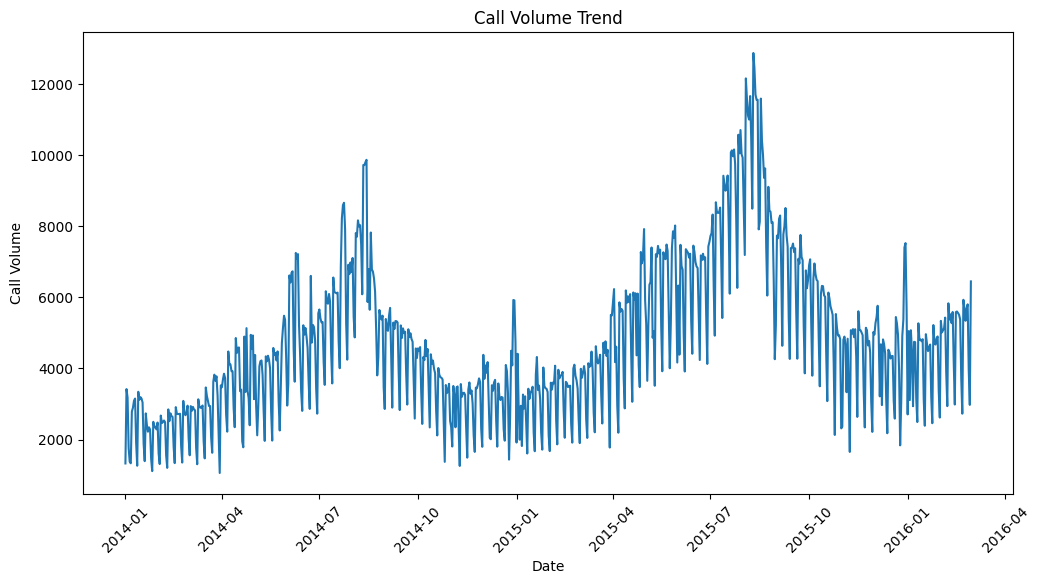

In [14]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the time series plot
sns.lineplot(x="ds", y="y", data=df)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Call Volume')
plt.title('Call Volume Trend')

# Show the plot
plt.show()

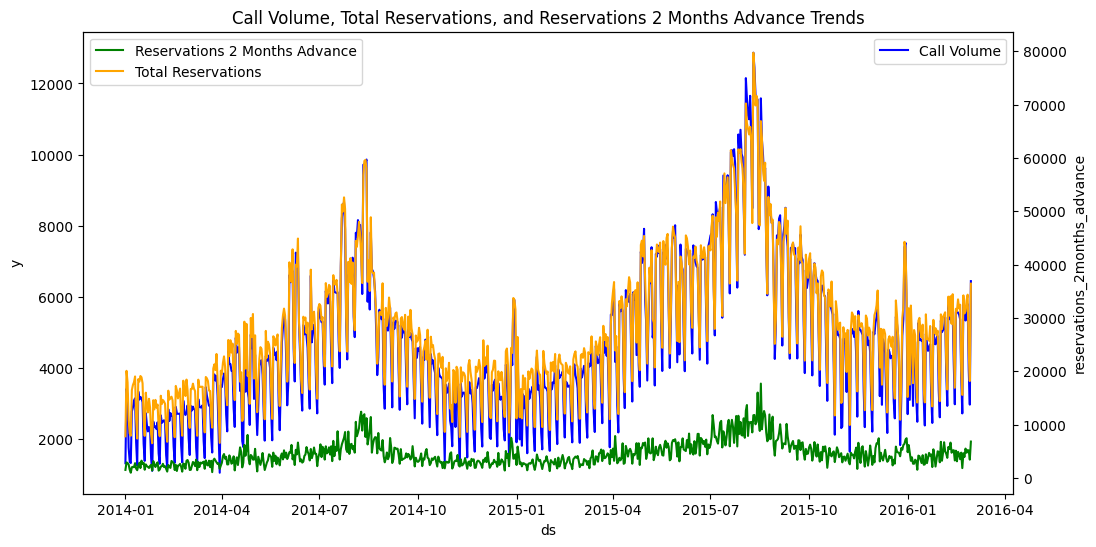

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the time series plot for call volume
sns.lineplot(x="ds", y="y", data=df, color='blue', label='Call Volume')

# Create secondary y-axis for reservations_2months_advance
ax2 = plt.gca().twinx()
sns.lineplot(x="ds", y="reservations_2months_advance", data=df, color='green', ax=ax2, label='Reservations 2 Months Advance')

# Plot total reservations on the primary y-axis
sns.lineplot(x="ds", y="total_reservations", data=df, color='orange', label='Total Reservations')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)
# Set the title
plt.title('Call Volume, Total Reservations, and Reservations 2 Months Advance Trends')

# Show the legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

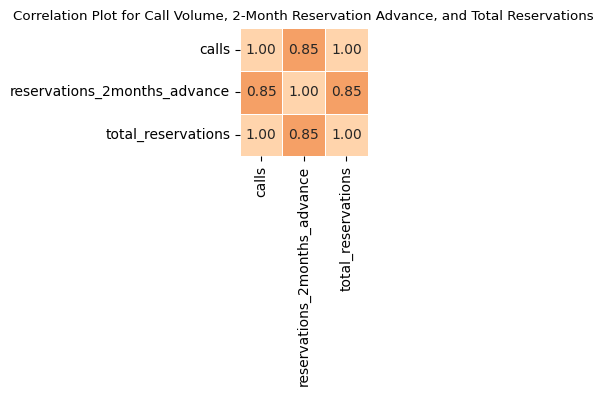

In [16]:
# Select relevant columns
columns_of_interest = ['calls', 'reservations_2months_advance', 'total_reservations']
df_subset = df[columns_of_interest]

# Compute the correlation matrix
corr = df_subset.corr()

# Set up the matplotlib figure with smaller size
plt.figure(figsize=(6, 4))

# Draw the heatmap without the mask
sns.heatmap(corr, annot=True, fmt=".2f", center=0, square=True,
            linewidths=.5, cbar=False)  # Remove the color bar


# Increase font size of annotations
plt.rcParams['font.size'] = 8

plt.title('Correlation Plot for Call Volume, 2-Month Reservation Advance, and Total Reservations')
plt.tight_layout()  # Adjust layout to save space
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          790 non-null    datetime64[ns]
 1   calls                         790 non-null    int64         
 2   weekday                       790 non-null    object        
 3   reservations_2months_advance  790 non-null    int64         
 4   total_reservations            790 non-null    int64         
 5   summer_break                  790 non-null    int64         
 6   christmas_break               790 non-null    int64         
 7   special_day                   790 non-null    int64         
 8   dayofweek                     790 non-null    int32         
 9   quarter                       790 non-null    int32         
 10  month                         790 non-null    int32         
 11  year                          79

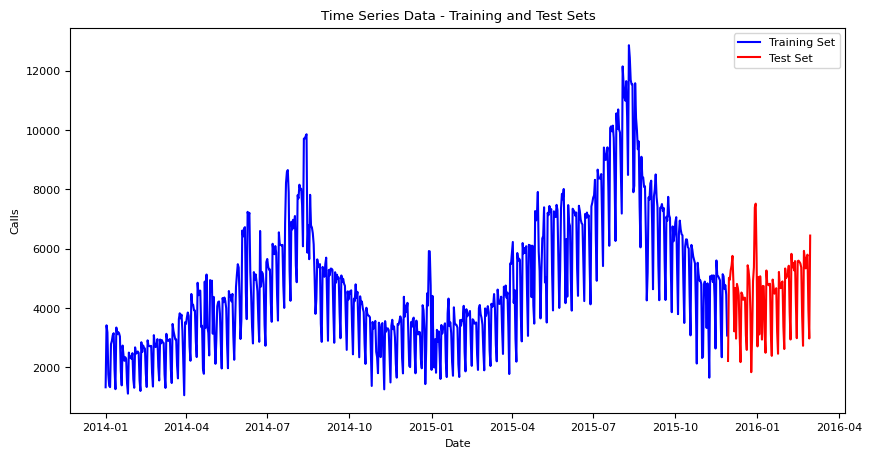

In [18]:
# Calculate the index position for splitting (last 30%)
#split_index = int(len(df) * 0.9)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Calculate the index position for splitting (using recent 3 months)
split_date = df['date'].max() - pd.DateOffset(months=3)
split_index = df[df['date'] >= split_date].index[0]

# Split the dataset into training and test sets
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Plot train and test datasets with different colors
plt.figure(figsize=(10, 5))
plt.plot(train_df['date'], train_df['y'], color='blue', label='Training Set')
plt.plot(test_df['date'], test_df['y'], color='red', label='Test Set')
plt.title('Time Series Data - Training and Test Sets')
plt.xlabel('Date')
plt.ylabel('Calls')
plt.legend()
plt.show()